# Assignment 8 - book examples

### 1. Working through the books examples

In [5]:
import sys
sys.path.append("C:\\Users\\Mathias\\Desktop\\SOFT-2022\\Datascience\\bookData\\bookData")
from scratch.linear_algebra import Vector

In [6]:
def num_differences(v1: Vector, v2: Vector) -> int:
    assert len(v1) == len(v2)
    return len([x1 for x1, x2 in zip(v1, v2) if x1 != x2])

assert num_differences([1,2,3], [2,1,3]) == 2
assert num_differences([1,2], [1,2]) == 0

In [7]:
from typing import List
from scratch.linear_algebra import vector_mean

In [8]:
def cluster_means(k: int,
                 inputs: List[Vector],
                 assignments: List[int]) -> List[Vector]:
    # clusters[i] contains the inputs whose assignment is i
    clusters = [[] for i in range(k)]
    for input, assignment in zip(inputs, assignments):
        clusters[assignment].append(input)

    # if a cluster is empty, just use a random point
    return [vector_mean(cluster) if cluster else random.choice(inputs)
           for cluster in clusters]

In [9]:
import itertools
import random
import tqdm
from scratch.linear_algebra import squared_distance

In [11]:
class KMeans:
    def __init__(self, k: int) -> None:
        self.k = k  # number of clusters
        self.means = None
        
    def classify(self, input: Vector) -> int:
        """return the index of the cluster closest to the input"""
        return min(range(self.k),
                  key=lambda i: squared_distance(input, self.means[i]))
    
    def train(self, inputs: List[Vector]) -> None:
        # Start with random assignments
        assignments = [random.randrange(self.k) for _ in inputs]
        
        with tqdm.tqdm(itertools.count()) as t:
            for _ in t:
                # Compute means and find new assignments
                self.means = cluster_means(self.k, inputs, assignments)
                new_assignments = [self.classify(input) for input in inputs]
                
                # Check how many assignments changed and if we're done
                num_changed = num_differences(assignments, new_assignments)
                if num_changed == 0:
                    return
                # Otherwise keep the new assignments, and compute new means
                assignments = new_assignments
                self.means = cluster_means(self.k, inputs, assignments)
                t.set_description(f"changed: {num_changed} / {len(inputs)}")

#### Example Meetups

In [71]:
random.seed(12)
inputs: List[List[float]] = [[-14,-5],[13,13],[20,23],[-19,-11],[-9,-16],[21,27],[-49,15],[26,13],[-46,5],[-34,-1],[11,15],[-49,0],[-22,-16],[19,28],[-12,-8],[-13,-19],[-41,8],[-11,-6],[-25,-9],[-18,-3]]
clusterer = KMeans(k=3)
clusterer.train(inputs)
means = sorted(clusterer.means) # sort for the unit test

assert len(means) == 3

# Check that the means are close to what we expect
assert squared_distance(means[0], [-44, 5]) < 1
assert squared_distance(means[1], [-16, -10]) < 1
assert squared_distance(means[2], [18, 20]) < 1

changed: 1 / 20: : 2it [00:00, 2020.86it/s]


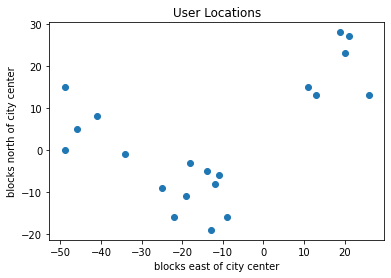

In [72]:
x,y = zip(*inputs)
plt.scatter(x,y)
plt.title("User Locations")
plt.xlabel("blocks east of city center")
plt.ylabel("blocks north of city center")
plt.show()

#### Choosing K

In [78]:
import matplotlib.pyplot as plt

In [79]:
def squared_clustering_errors(inputs: List[Vector], k: int) -> float:
    """finds the total squared error from k-means clustering the inputs"""
    clusterer = KMeans(k)
    clusterer.train(inputs)
    means = clusterer.means
    assignments = [clusterer.classify(input) for input in inputs]
    
    return sum(squared_distance(input, means[cluster])
              for input, cluster in zip(inputs, assignments))

0it [00:00, ?it/s]
changed: 3 / 20: : 3it [00:00, 998.33it/s]
changed: 2 / 20: : 2it [00:00, 1004.86it/s]
changed: 3 / 20: : 2it [00:00, 500.16it/s]
changed: 1 / 20: : 3it [00:00, 600.04it/s]
changed: 7 / 20: : 2it [00:00, 999.83it/s]
changed: 1 / 20: : 3it [00:00, 1504.59it/s]
changed: 1 / 20: : 4it [00:00, 666.90it/s]
changed: 1 / 20: : 3it [00:00, 999.52it/s]
changed: 7 / 20: : 2it [00:00, 664.23it/s]
changed: 2 / 20: : 4it [00:00, 668.60it/s]
changed: 2 / 20: : 3it [00:00, 750.86it/s]
changed: 4 / 20: : 2it [00:00, 667.19it/s]
changed: 8 / 20: : 2it [00:00, 665.66it/s]
changed: 2 / 20: : 3it [00:00, 599.73it/s]
changed: 1 / 20: : 3it [00:00, 748.63it/s]
changed: 11 / 20: : 1it [00:00, 1000.55it/s]
changed: 1 / 20: : 5it [00:00, 714.43it/s]
changed: 1 / 20: : 7it [00:00, 777.79it/s]
changed: 1 / 20: : 5it [00:00, 624.56it/s]


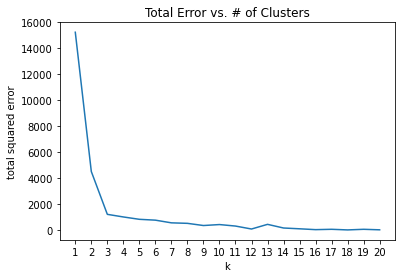

In [80]:
ks = range(1, len(inputs) +1)
errors = [squared_clustering_errors(inputs, k) for k in ks]

plt.plot(ks, errors)
plt.xticks(ks)
plt.xlabel("k")
plt.ylabel("total squared error")
plt.title("Total Error vs. # of Clusters")
plt.show()

#### Example Clustering Colors

In [17]:
image_path = r"../crash.jpg"
import matplotlib.image as mpimg
img = mpimg.imread(image_path) / 256

In [14]:
top_row = img[0]
top_left_pixel = top_row[0]
red, green, blue = top_left_pixel

# .tolist() converts a NumPy array to a Python list
pixels = [pixel.tolist() for row in img for pixel in row]

clusterer = KMeans(5)
clusterer.train(pixels)

changed: 5 / 179648: : 34it [00:59,  1.74s/it]    


In [15]:
def recolor(pixel: Vector) -> Vector:
    cluster = clusterer.classify(pixel)
    return clusterer.means[cluster]

new_img = [[recolor(pixel) for pixel in row] for row in img]

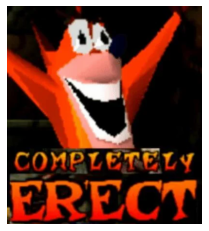

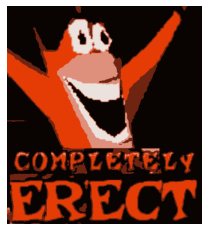

In [21]:
plt.imshow(img)
plt.axis('off')
plt.show()
plt.imshow(new_img)
plt.axis('off')
plt.show()

#### Buttom-Up Hierchical Clustering

In [22]:
from typing import NamedTuple, Union

In [23]:
class Leaf(NamedTuple):
    value: Vector

leaf1 = Leaf([10, 20])
leaf2 = Leaf([30, -15])

In [24]:
class Merged(NamedTuple):
    children: tuple
    order: int

merged = Merged((leaf1, leaf2), order=1)

Cluster = Union[Leaf, Merged]

In [25]:
def get_values(cluster: Cluster) -> List[Vector]:
    if isinstance(cluster, Leaf):
        return [cluster.value]
    else:
        return [value
                for child in cluster.children
                for value in get_values(child)]

assert get_values(merged) == [[10,20], [30,-15]]

In [26]:
from typing import Callable
from scratch.linear_algebra import distance

In [28]:
def cluster_distance(cluster1: Cluster,
                    cluster2: Cluster,
                    distance_agg: Callable = min) -> float:
    """
    compute all the pairwise distances between cluster1 and cluster2
    and apply the aggregation function _distance_agg_ to the resulting list
    """
    return distance_agg([distance(v1, v2)
                        for v1 in get_values(cluster1)
                        for v2 in get_values(cluster2)])

In [31]:
def get_merge_order(cluster: Cluster) -> float:
    if isinstance(cluster, Leaf):
        return float("inf") # was never merged
    else:
        return cluster.order

In [30]:
from typing import Tuple

In [32]:
def get_children(cluster: Cluster):
    if isinstance(cluster, Leaf):
        raise TypeError("Leaf has no children")
    else:
        return cluster.children

In [33]:
def bottom_up_cluster(inputs: List[Vector],
                     distance_agg: Callable = min) -> Cluster:
    # Start with all leaves
    clusters: List[Cluster] = [Leaf(input) for input in inputs]
    
    def pair_distance(pair: Tuple[Cluster, Cluster]) -> float:
        return cluster_distance(pair[0], pair[1], distance_agg)
    
    # as long as we have more than one cluster left...
    while len(clusters) > 1:
        # find the who closest clusters
        c1, c2 = min(((cluster1, cluster2)
                     for i, cluster1 in enumerate(clusters)
                     for cluster2 in clusters[:i]),
                    key=pair_distance)
        # remove them from the list of clusters
        clusters = [c for c in clusters if c != c1 and c != c2]
        
        # merge them, using merge_order = # of clusters left
        merged_cluster = Merged((c1, c2), order=len(clusters))
        
        # and add their merge
        clusters.append(merged_cluster)
    
    # when there's only one cluster left, return it
    return clusters[0]

In [37]:
base_cluster = bottom_up_cluster(inputs)
base_cluster

Merged(children=(Merged(children=(Merged(children=(Merged(children=(Merged(children=(Leaf(value=[19, 28]), Leaf(value=[21, 27])), order=18), Leaf(value=[20, 23])), order=14), Leaf(value=[26, 13])), order=3), Merged(children=(Leaf(value=[11, 15]), Leaf(value=[13, 13])), order=16)), order=1), Merged(children=(Merged(children=(Merged(children=(Merged(children=(Merged(children=(Leaf(value=[-49, 0]), Leaf(value=[-46, 5])), order=11), Leaf(value=[-41, 8])), order=9), Leaf(value=[-49, 15])), order=5), Leaf(value=[-34, -1])), order=4), Merged(children=(Merged(children=(Merged(children=(Merged(children=(Leaf(value=[-22, -16]), Leaf(value=[-19, -11])), order=10), Leaf(value=[-25, -9])), order=8), Merged(children=(Merged(children=(Merged(children=(Leaf(value=[-11, -6]), Leaf(value=[-12, -8])), order=17), Leaf(value=[-14, -5])), order=15), Leaf(value=[-18, -3])), order=13)), order=7), Merged(children=(Leaf(value=[-13, -19]), Leaf(value=[-9, -16])), order=12)), order=6)), order=2)), order=0)

In [38]:
def generate_clusters(base_cluster: Cluster,
                     num_clusters: int) -> List[Cluster]:
    # start with a list with just the base cluster
    clusters = [base_cluster]
    
    # as long as we don't have enough clusters yet
    while len(clusters) < num_clusters:
        # choose the last-merged of our clusters
        next_cluster = min(clusters, key=get_merge_order)
        # remove it from the list
        clusters = [c for c in clusters if c != next_cluster]
        
        # and add its children to the list (i.e.m unmerge it)
        clusters.extend(get_children(next_cluster))
    
    # once we have enough clusters...
    return clusters

In [46]:
def generate_clusters_max(base_cluster: Cluster,
                     num_clusters: int) -> List[Cluster]:
    # start with a list with just the base cluster
    clusters = [base_cluster]
    
    # as long as we don't have enough clusters yet
    while len(clusters) < num_clusters:
        # choose the last-merged of our clusters
        next_cluster = max(clusters, key=get_merge_order)
        # remove it from the list
        clusters = [c for c in clusters if c != next_cluster]
        
        # and add its children to the list (i.e.m unmerge it)
        clusters.extend(get_children(next_cluster))
    
    # once we have enough clusters...
    return clusters

In [76]:
three_clusters = [get_values(cluster)
                 for cluster in generate_clusters(base_cluster, 3)]
three_clusters_max = [get_values(cluster)
                 for cluster in generate_clusters_max(base_cluster, 3)]

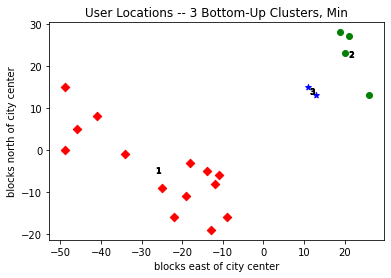

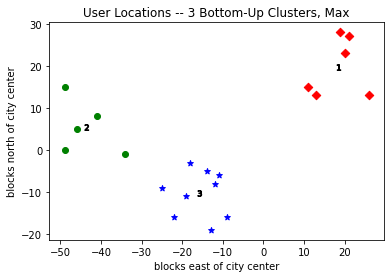

In [77]:
for i, cluster, marker, color in zip([1,2,3],
                                    three_clusters,
                                    ["D", "o", "*"],
                                    ["r", "g", "b"]):
    xs, ys = zip(*cluster)  # magic unzipping trick
    plt.scatter(xs, ys, color=color, marker=marker)
    
    # put a number at the mean of the cluster
    x, y = vector_mean(cluster)
    plt.plot(x,y, marker="$"+str(i) + "$", color="black")

plt.title("User Locations -- 3 Bottom-Up Clusters, Min")
plt.xlabel("blocks east of city center")
plt.ylabel("blocks north of city center")
plt.show()

# ---------------- vvv max vvv -----------------
for i, cluster, marker, color in zip([1,2,3],
                                    three_clusters_max,
                                    ["D", "o", "*"],
                                    ["r", "g", "b"]):
    xs, ys = zip(*cluster)  # magic unzipping trick
    plt.scatter(xs, ys, color=color, marker=marker)
    
    # put a number at the mean of the cluster
    x, y = vector_mean(cluster)
    plt.plot(x,y, marker="$"+str(i) + "$", color="black")

plt.title("User Locations -- 3 Bottom-Up Clusters, Max")
plt.xlabel("blocks east of city center")
plt.ylabel("blocks north of city center")
plt.show()